<a href="https://colab.research.google.com/github/adamelhorri/credit-model/blob/main/credit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [1]:
#packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit ,train_test_split


In [3]:
#reading DB
pd.set_option('display.max_rows', 20)
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#access and analyze missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#sorting columns by missing values
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#counting frequency and analysing data types
df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
#creating 2 tables one for numerical values and one for other value types

cat_data=[]
num_data=[]

for i,j in enumerate(df.dtypes):
  if j==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
num_data=pd.DataFrame(num_data).transpose()
cat_data=pd.DataFrame(cat_data).transpose()

num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [8]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [9]:
#political filling of empty cases with most frequent objects
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [10]:
#counting number of types of values for education of clients
cat_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
#political filling of empty cases for numeric values
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [12]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [13]:
#mapping loaning status in binary using a dictionnary
target_value={
    'Y':1,'N':0
}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [14]:
#remplacing cat objects with binary values
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [15]:
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [16]:
#conctat the two tables
x=pd.concat([cat_data,num_data],axis=1)
y=target



In [17]:
#concat of all tables
df=pd.concat([cat_data,num_data,target],axis=1)

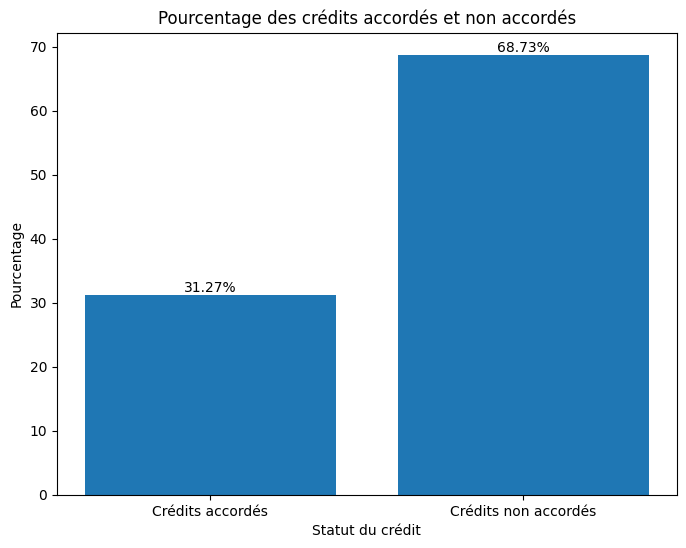

In [18]:
######################### DATA VISUALISATION ###################################
# calculating pourcentages
yes = target.value_counts()[0] / len(target)
no = target.value_counts()[1] / len(target)

# Ceating graphics
labels = ['Crédits accordés', 'Crédits non accordés']
percentages = [yes*100, no*100]

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages)

# adding text
for i, v in enumerate(percentages):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

# title and axis text
plt.title('Pourcentage des crédits accordés et non accordés')
plt.xlabel('Statut du crédit')
plt.ylabel('Pourcentage')

# printing
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


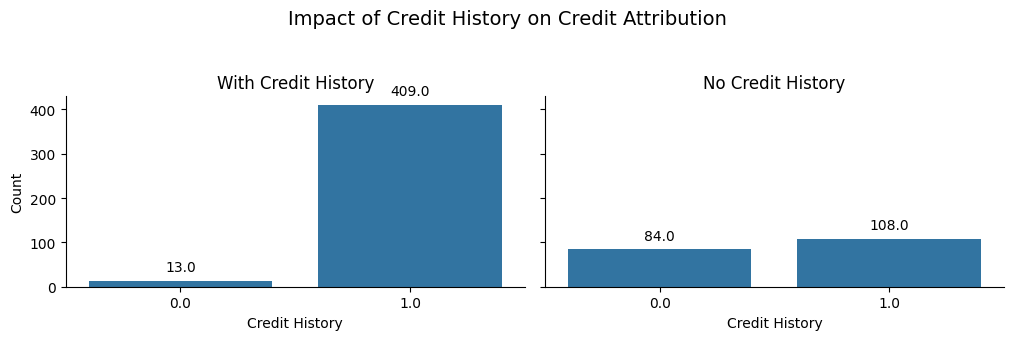

In [19]:
#analysis and data visualisation of credit attribution based on credit history
df['Loan_Status_Label'] = df['Loan_Status'].map({1: 'With Credit History', 0: 'No Credit History'})

grid = sns.FacetGrid(df, col='Loan_Status_Label', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


grid.set_axis_labels('Credit History', 'Count')


for ax in grid.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


    ax.set_title(ax.get_title().split('=')[1].strip())


grid.fig.suptitle('Impact of Credit History on Credit Attribution', fontsize=14, y=1.05)
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


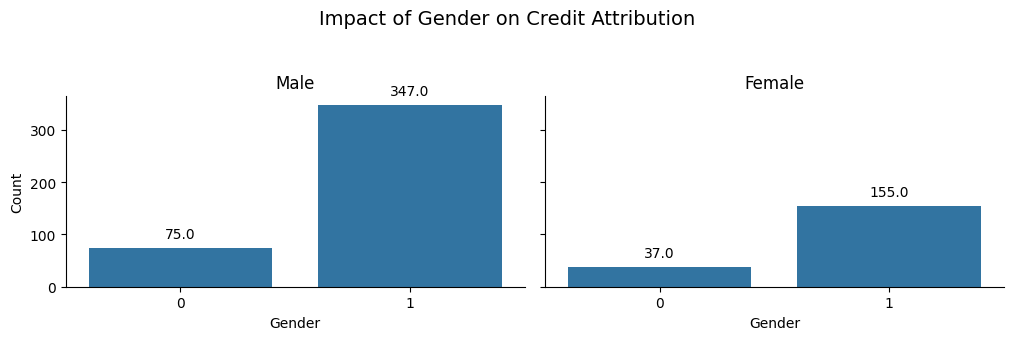

In [20]:
#analysis and data visualisation of credit attribution based on Gender
df['Loan_Status_Label'] = df['Loan_Status'].map({1: 'Male', 0: 'Female'})

grid = sns.FacetGrid(df, col='Loan_Status_Label', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')


grid.set_axis_labels('Gender', 'Count')


for ax in grid.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


    ax.set_title(ax.get_title().split('=')[1].strip())


grid.fig.suptitle('Impact of Gender on Credit Attribution', fontsize=14, y=1.05)
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


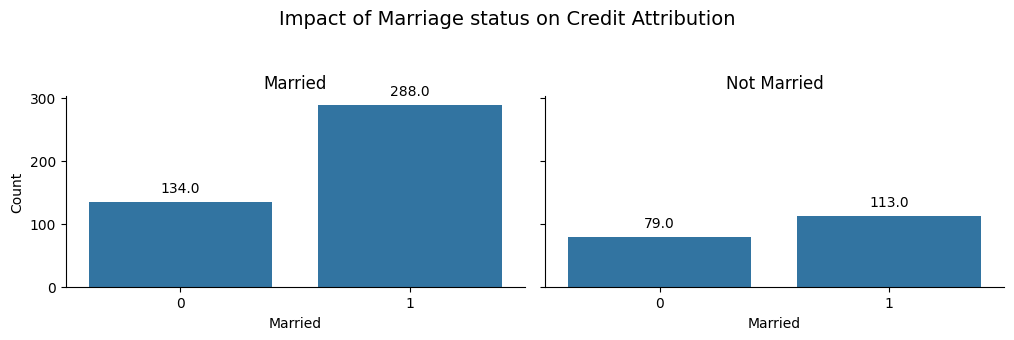

In [21]:
#analysis and data visualisation of credit attribution based on Relationship situation of client
df['Loan_Status_Label'] = df['Loan_Status'].map({1: 'Married', 0: 'Not Married'})

grid = sns.FacetGrid(df, col='Loan_Status_Label', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')


grid.set_axis_labels('Married', 'Count')


for ax in grid.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


    ax.set_title(ax.get_title().split('=')[1].strip())


grid.fig.suptitle('Impact of Marriage status on Credit Attribution', fontsize=14, y=1.05)
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


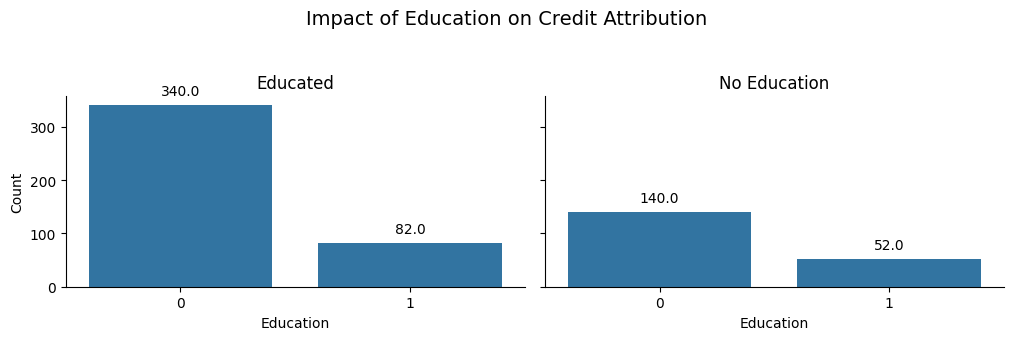

In [22]:
#analysis and data visualisation of credit attribution based on the education client
df['Loan_Status_Label'] = df['Loan_Status'].map({1: 'Educated', 0: 'No Education'})

grid = sns.FacetGrid(df, col='Loan_Status_Label', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')


grid.set_axis_labels('Education', 'Count')


for ax in grid.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


    ax.set_title(ax.get_title().split('=')[1].strip())


grid.fig.suptitle('Impact of Education on Credit Attribution', fontsize=14, y=1.05)
plt.tight_layout()

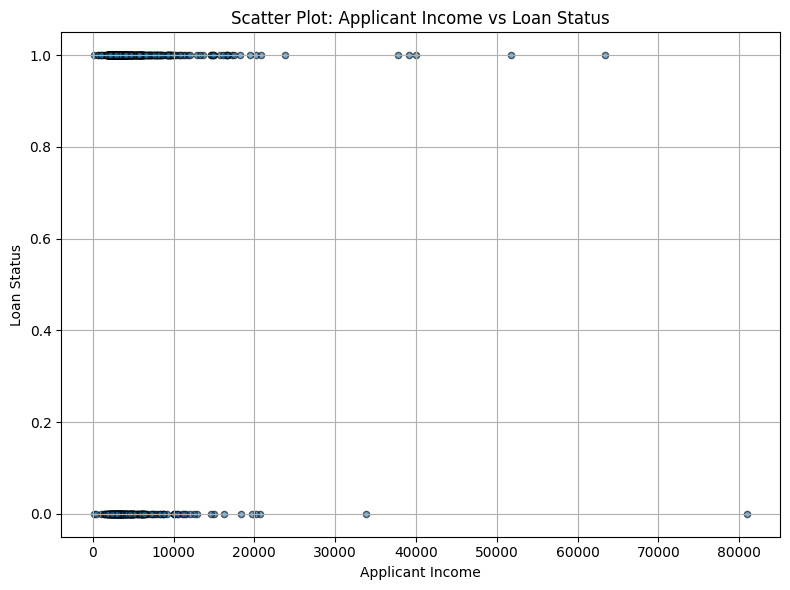

In [23]:
#impact of clients revenue (not relevant)
plt.figure(figsize=(8, 6))
plt.scatter(df['ApplicantIncome'], df['Loan_Status'], s=20, alpha=0.6, edgecolors='black')


plt.xlabel('Applicant Income')
plt.ylabel('Loan Status')


plt.title('Scatter Plot: Applicant Income vs Loan Status')


plt.grid(True)
plt.tight_layout()

In [24]:
#subdivision of database to test and train (TODO)
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train , test in sss.split(x,y):
  x_train,x_test=x.iloc[train],x.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

  print('x_train taille ', x_train.shape)
  print('x_test taille ', x_test.shape)


x_train taille  (491, 11)
x_test taille  (123, 11)
